In [1]:
import pandas as pd

df = pd.read_csv('./combined_flight_data.csv')

print(df.head())


  Departure Airport       Departure Time Arrival Airport         Arrival Time  \
0               SGN  2024-09-15 05:25:00             HAN  2024-09-15 07:35:00   
1               SGN  2024-09-15 06:00:00             HAN  2024-09-15 08:10:00   
2               SGN  2024-09-15 06:40:00             HAN  2024-09-15 08:50:00   
3               SGN  2024-09-15 07:00:00             HAN  2024-09-15 09:10:00   
4               SGN  2024-09-15 08:10:00             HAN  2024-09-15 10:20:00   

  Carrier Code  Flight Number  Price (VND) Duration  
0           VJ            198    1541000.0  PT2H10M  
1           VJ            120    1541000.0  PT2H10M  
2           VJ            168    1541000.0  PT2H10M  
3           VJ            122    1541000.0  PT2H10M  
4           VJ            124    1541000.0  PT2H10M  


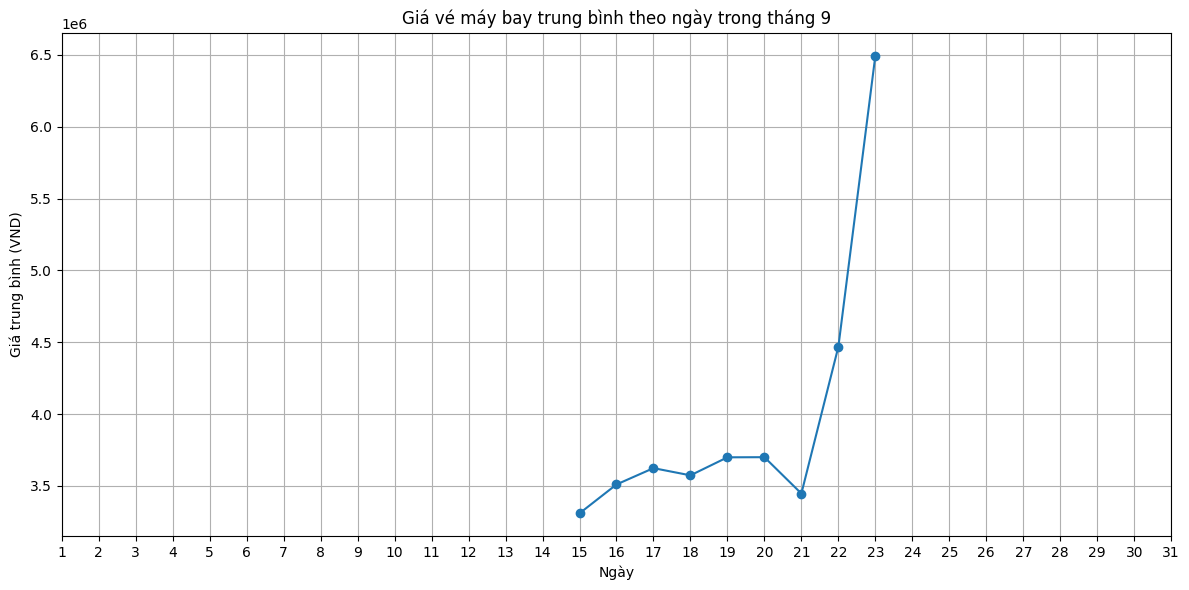

Giá vé trung bình theo ngày trong tháng 9:
   Day   Price (VND)
0   15  3.308466e+06
1   16  3.509517e+06
2   17  3.623226e+06
3   18  3.573072e+06
4   19  3.698562e+06
5   20  3.699503e+06
6   21  3.446379e+06
7   22  4.468408e+06
8   23  6.495000e+06


In [2]:
import matplotlib.pyplot as plt

# Chuyển đổi cột 'Departure Time' thành định dạng datetime nếu chưa được chuyển đổi
df['Departure Time'] = pd.to_datetime(df['Departure Time'])

# Lọc dữ liệu cho tháng 9
df_september = df[df['Departure Time'].dt.month == 9]

# Tạo cột mới 'Day' để lưu trữ ngày của chuyến bay
df_september['Day'] = df_september['Departure Time'].dt.day

# Tính giá trung bình theo ngày
daily_avg_price = df_september.groupby('Day')['Price (VND)'].mean().reset_index()

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
plt.plot(daily_avg_price['Day'], daily_avg_price['Price (VND)'], marker='o')
plt.title('Giá vé máy bay trung bình theo ngày trong tháng 9')
plt.xlabel('Ngày')
plt.ylabel('Giá trung bình (VND)')
plt.xticks(range(1, 32))
plt.grid(True)
plt.tight_layout()
plt.show()

print("Giá vé trung bình theo ngày trong tháng 9:")
print(daily_avg_price)




In [3]:
df['Departure Time'] = pd.to_datetime(df['Departure Time'])
df['Arrival Time'] = pd.to_datetime(df['Arrival Time'])

start_date = pd.to_datetime('2024-09-01')
end_date = pd.to_datetime('2025-01-30')
date_range = pd.date_range(start=start_date, end=end_date)

new_df = pd.DataFrame()

for date in date_range:
    temp_df = df.copy()
    temp_df['Departure Time'] = temp_df['Departure Time'].apply(lambda x: x.replace(year=date.year, month=date.month, day=date.day))
    temp_df['Arrival Time'] = temp_df['Arrival Time'].apply(lambda x: x.replace(year=date.year, month=date.month, day=date.day))
    new_df = pd.concat([new_df, temp_df])

new_df = new_df.sort_values('Departure Time').reset_index(drop=True)


print(new_df.head())

df = new_df
df['Departure Time'] = df['Departure Time'].dt.strftime('%Y-%m-%d %H:%M:%S')
df['Arrival Time'] = df['Arrival Time'].dt.strftime('%Y-%m-%d %H:%M:%S')

  Departure Airport      Departure Time Arrival Airport        Arrival Time  \
0               HAN 2024-09-01 05:00:00             VCS 2024-09-01 07:15:00   
1               SGN 2024-09-01 05:00:00             HAN 2024-09-01 07:15:00   
2               SGN 2024-09-01 05:00:00             HAN 2024-09-01 07:15:00   
3               HAN 2024-09-01 05:00:00             VCS 2024-09-01 07:15:00   
4               SGN 2024-09-01 05:00:00             HAN 2024-09-01 07:15:00   

  Carrier Code  Flight Number  Price (VND) Duration  
0           QH           1033    4495000.0  PT2H15M  
1           VN            204    6887000.0  PT2H15M  
2           VN            204    4626000.0  PT2H15M  
3           QH           1033    4507000.0  PT2H15M  
4           VN            204    6867000.0  PT2H15M  


In [4]:
print(df.shape)
df.head()


(1193504, 8)


,Departure Airport,Departure Time,Arrival Airport,Arrival Time,Carrier Code,Flight Number,Price (VND),Duration
0,HAN,2024-09-01 05:00:00,VCS,2024-09-01 07:15:00,QH,1033,4495000.0,PT2H15M
1,SGN,2024-09-01 05:00:00,HAN,2024-09-01 07:15:00,VN,204,6887000.0,PT2H15M
2,SGN,2024-09-01 05:00:00,HAN,2024-09-01 07:15:00,VN,204,4626000.0,PT2H15M
3,HAN,2024-09-01 05:00:00,VCS,2024-09-01 07:15:00,QH,1033,4507000.0,PT2H15M
4,SGN,2024-09-01 05:00:00,HAN,2024-09-01 07:15:00,VN,204,6867000.0,PT2H15M


In [10]:
import mysql.connector
import os
from dotenv import load_dotenv

load_dotenv()

mydb = mysql.connector.connect(
  host=os.getenv('DB_HOST'),
  user=os.getenv('DB_USER'),
  password=os.getenv('DB_PASSWORD'),
  database=os.getenv('DB_NAME'),
)

mycursor = mydb.cursor()

print("Đã kết nối thành công đến MySQL!")



Đã kết nối thành công đến MySQL!


In [11]:
create_table_sql = """
CREATE TABLE IF NOT EXISTS flights (
    id INT AUTO_INCREMENT PRIMARY KEY,
    departure_airport VARCHAR(10),
    departure_time DATETIME,
    arrival_airport VARCHAR(10),
    arrival_time DATETIME,
    carrier_code VARCHAR(5),
    flight_number VARCHAR(10),
    price DECIMAL(10, 2),
    duration VARCHAR(10)
)
"""

try:
    mycursor.execute(create_table_sql)
    print("Đang khởi tạo bảng flights")

    values = df[['Departure Airport', 'Departure Time', 'Arrival Airport', 'Arrival Time', 
                 'Carrier Code', 'Flight Number', 'Price (VND)', 'Duration']].values.tolist()

    insert_sql = """
    INSERT INTO flights 
    (departure_airport, departure_time, arrival_airport, arrival_time, 
     carrier_code, flight_number, price, duration) 
    VALUES (%s, %s, %s, %s, %s, %s, %s, %s)
    """

    mycursor.executemany(insert_sql, values)
    
    mydb.commit()
    
    print(f"Đã chèn thành công {mycursor.rowcount} bản ghi vào bảng flights.")
except mysql.connector.Error as error:
    print(f"Lỗi khi thao tác với MySQL: {error}")



Đang khởi tạo bảng flights
Lỗi khi thao tác với MySQL: 2055: Lost connection to MySQL server at '127.0.0.1:3306', system error: 8 EOF occurred in violation of protocol (_ssl.c:2417)


In [7]:
mycursor.execute("SELECT * FROM flights")

rows = mycursor.fetchall()

print("Dữ liệu từ bảng flights:")
for row in rows:
    print(row)


Dữ liệu từ bảng flights:


In [8]:
if mydb.is_connected():
        mycursor.close()
        mydb.close()
        print("Kết nối MySQL đã đóng.")

Kết nối MySQL đã đóng.
